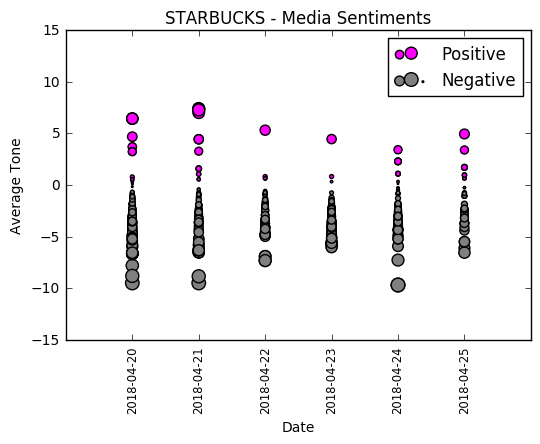

In [153]:
# Quick prototype to demonstrate a concept, by Ronny Ashar
# April 28, 2018

# I have extracted GDELT MNC(Multinational Corporations) data for a particular date range and plot AvgTone
# Reference: http://data.gdeltproject.org
# Reference http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf
'''
from http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf AvgTone definition as below:
 AvgTone. (numeric) This is the average “tone” of all documents containing one or more
mentions of this event. The score ranges from -100 (extremely negative) to +100 (extremely
positive). Common values range between -10 and +10, with 0 indicating neutral. This can be
used as a method of filtering the “context” of events as a subtle measure of the importance of
an event and as a proxy for the “impact” of that event. For example, a riot event with a slightly
negative average tone is likely to have been a minor occurrence, whereas if it had an extremely
negative average tone, it suggests a far more serious occurrence. A riot with a positive score
likely suggests a very minor occurrence described in the context of a more positive narrative
(such as a report of an attack occurring in a discussion of improving conditions
'''

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

def plotBrandSentiment(brand):
    #Importing data
    dfBig = pd.read_csv('C:\\DataIncubator\\Project\\MNCActor1April20-25.csv')
    df = dfBig[['SQLDATE', 'GLOBALEVENTID', 'Actor1Name', 'AvgTone']]
    #Printing head
    dfBrand = df[df['Actor1Name'] == brand]
    dfBrandPositive = dfBrand[dfBrand['AvgTone'] >= 0.0]
    #dfBrandPositive.head()
    dfBrandNegative = dfBrand[dfBrand['AvgTone'] < 0.0]
    #dfBrandNegative.head()

    #plt.scatter(dfBrandNegative['SQLDATE'], dfBrandNegative['AvgTone'], c='r')
    fig, ax = plt.subplots()
    ax = dfBrandPositive.plot.scatter('SQLDATE', 'AvgTone', s=dfBrandPositive['AvgTone']*10, c='magenta', label='Positive', ax=ax)
    dfBrandNegative.plot.scatter('SQLDATE', 'AvgTone', s=dfBrandNegative['AvgTone']*(-10), c='grey', label='Negative', ax=ax)
    ax.set_title(brand + ' - Media Sentiments')
    ax.set_xlabel('Date')
    ax.set_ylabel('Average Tone')
    ax.legend()
    axes = plt.gca()
    # Ronny todo -- for the current proof of concept crop the y axis to [-15, 15] since that encompasses the usual range
    # later on I could extract mix and max and set the range based on it
    # I am doing this because I want the graph to be centered at 0 so as to give a true visual indication of positive or negative sentiment
    axes.set_ylim([-15, 15])
    dateLabels = ['', '2018-04-20', '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24', '2018-04-25', '']
    ax.xaxis.set_ticklabels(dateLabels, size='small', rotation='vertical')
    #plt.xticks(range(len(t12)), t11, size='small', rotation='vertical')
    plt.show()
    
    return

plotBrandSentiment("STARBUCKS")